In [16]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
alo = {
    'co' : np.array([3.2624510E+00,  1.5119409E-03, -3.8817550E-06,  5.5819440E-09, -2.4749510E-12, -1.4310539E+04,  4.8488970E+00]),
    'co2': np.array([2.2757240E+00,  9.9220720E-03, -1.0409113E-05,  6.8666860E-09, -2.1172800E-12, -4.8373140E+04,  1.0188488E+01]),
    'h2' : np.array([3.2981240E+00,  8.2494410E-04, -8.1430150E-07, -9.4754340E-11,  4.1348720E-13, -1.0125209E+03, -3.2940940E+00]),
    'h'  : np.array([2.5000000E+00,  0.0000000E+00,  0.0000000E+00,  0.0000000E+00,  0.0000000E+00,  2.5471620E+04, -4.6011760E-01]),
    'oh' : np.array([3.6372660E+00,  1.8509100E-04, -1.6761646E-06,  2.3872020E-09, -8.4314420E-13,  3.6067810E+03,  1.3588605E+00]),
    'h2o': np.array([3.3868420E+00,  3.4749820E-03, -6.3546960E-06,  6.9685810E-09, -2.5065880E-12, -3.0208110E+04,  2.5902320E+00]),
    'n2' : np.array([3.2986770E+00,  1.4082404E-03, -3.9632220E-06,  5.6415150E-09, -2.4448540E-12, -1.0208999E+03,  3.9503720E+00]),
    'n'  : np.array([2.5030710E+00, -2.1800180E-05,  5.4205290E-08, -5.6475600E-11,  2.0999040E-14,  5.6098900E+04,  4.1675660E+00]),
    'no' : np.array([3.3765410E+00,  1.2530634E-03, -3.3027500E-06,  5.2178100E-09, -2.4462620E-12,  9.8179610E+03,  5.8295900E+00]),
    'o2' : np.array([3.2129360E+00,  1.1274864E-03, -5.7561500E-07,  1.3138773E-09, -8.7685540E-13, -1.0052490E+03,  6.0347370E+00]),
    'o'  : np.array([2.9464280E+00, -1.6381665E-03,  2.4210310E-06, -1.6028431E-09,  3.8906960E-13,  2.9147640E+04,  2.9639950E+00]),
    'ch4': np.array([7.7874150E-01,  1.7476680E-02, -2.7834090E-05,  3.0497080E-08, -1.2239307E-11, -9.8252290E+03,  1.3722195E+01]),
}
ahi = {
    'co' : np.array([3.0250780E+00,  1.4426885E-03, -5.6308270E-07,  1.0185813E-10, -6.9109510E-15, -1.4268350E+04,  6.1082170E+00]),
    'co2': np.array([4.4536230E+00,  3.1401680E-03, -1.2784105E-06,  2.3939960E-10, -1.6690333E-14, -4.8966960E+04, -9.5539590E-01]),
    'h2' : np.array([2.9914230E+00,  7.0006440E-04, -5.6338280E-08, -9.2315780E-12,  1.5827519E-15, -8.3503400E+02, -1.3551101E+00]),
    'h'  : np.array([2.5000000E+00,  0.0000000E+00,  0.0000000E+00,  0.0000000E+00,  0.0000000E+00,  2.5471620E+04, -4.6011760E-01]),
    'oh' : np.array([2.8827300E+00,  1.0139743E-03, -2.2768770E-07,  2.1746830E-11, -5.1263050E-16,  3.8868880E+03,  5.5957120E+00]),
    'h2o': np.array([2.6721450E+00,  3.0562930E-03, -8.7302600E-07,  1.2009964E-10, -6.3916180E-15, -2.9899210E+04,  6.8628170E+00]),
    'n2' : np.array([2.9266400E+00,  1.4879768E-03, -5.6847600E-07,  1.0097038E-10, -6.7533510E-15, -9.2279770E+02,  5.9805280E+00]),
    'n'  : np.array([2.4502680E+00,  1.0661458E-04, -7.4653370E-08,  1.8796520E-11, -1.0259839E-15,  5.6116040E+04,  4.4487580E+00]),
    'no' : np.array([3.2454350E+00,  1.2691383E-03, -5.0158900E-07,  9.1692830E-11, -6.2754190E-15,  9.8008400E+03,  6.4172930E+00]),
    'o2' : np.array([3.6975780E+00,  6.1351970E-04, -1.2588420E-07,  1.7752810E-11, -1.1364354E-15, -1.2339301E+03,  3.1891650E+00]),
    'o'  : np.array([2.5420590E+00, -2.7550610E-05, -3.1028030E-09,  4.5510670E-12, -4.3680510E-16,  2.9230800E+04,  4.9203080E+00]),
    'ch4': np.array([1.6834780E+00,  1.0237236E-02, -3.8751280E-06,  6.7855850E-10, -4.5034230E-14, -1.0080787E+04,  9.6233950E+00]),    
}

Rg = 8314.46      # J/kmol*K

def cp(sp, T):
    a = alo[sp] if T <= 1000 else ahi[sp]
    return Rg*( a[0] + T*(a[1] + T*(a[2] + T*(a[3] + T*(a[4])))) )

def h(sp,T):
    a = alo[sp] if T <= 1000 else ahi[sp]
    return Rg*( a[5] + T*(a[0] + T*(a[1]/2 + T*(a[2]/3 + T*(a[3]/4 + T*(a[4]/5))))) )

def s(sp,T):
    a = alo[sp] if T <= 1000 else ahi[sp]
    return Rg*( a[0]*np.log(T) + a[6] + T*(a[1] + T*(a[2]/2 + T*(a[3]/3 + T*(a[4]/4)))) )
    


### Compute $T_{ad}$

In [18]:
Tr = 300.0
hr = h('ch4', Tr) + 2*h('o2', Tr) + 7.52*h('n2', Tr)
Tp = fsolve(lambda T: h('co2',T) + 2*h('h2o',T) + 7.52*h('n2',T) - hr, Tr)[0]
print(f"Tp = {Tp:.2f} K")

Tp = 2328.51 K


In [19]:
def Ftozero(T):
    Tr = 300.0
    hr = h('ch4', Tr) + 2*h('o2', Tr) + 7.52*h('n2', Tr)
    hp = h('co2',T) + 2*h('h2o',T) + 7.52*h('n2',T)
    return hr - hp
    
Tp = fsolve(Ftozero, Tr)[0]
Tp, Ftozero(Tp)


(2328.5096476447256, -5.960464477539063e-08)

In [20]:
T = np.linspace(300,5000,1000)
cc = np.zeros(len(T))
for i in range(len(T)):
    cc[i] = cp('co2',T[i])
    

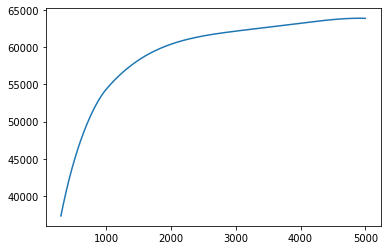

In [21]:
plt.plot(T,cc)